<a href="https://colab.research.google.com/github/alamin19/Descriptive-Analytics-of-Health-data/blob/main/Descriptive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
%matplotlib inline

# 4.1 Descriptive Analytics of Health data

# a) Read the csv file and display (report) the first five rows. Also, list the columns present in the csv file.


In [ ]:
df = pd.read_csv("CDCbirths.csv") # loading data as pandas dataframe

In [ ]:
df.head() # print first 5 rows

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
for each in df.columns: # print name of the columns in the dataset
    print(each)

year
month
day
gender
births


# b) Add a decade column, and obtain the male and female births as a function of decade (i.e., Fill in the following table) 

In [ ]:
df["decade"]=10*(df["year"]//10) # making decade from years
table = pd.pivot_table(df, values='births', index=['decade'], columns=['gender'], aggfunc=np.sum) # filling the table using pivot table 

table

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


# c) Visualize the total number of births by year. What trend do you observe? 

Text(0,0.5,'births per year')

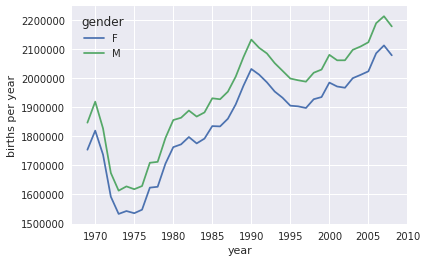

In [ ]:
sns.set()
df.pivot_table("births",index='year',columns="gender", aggfunc=np.sum).plot()
plt.ylabel("births per year")

# d) Plot births by weekday for several decades (1960, 1970, 1980)

handling missing data

In [ ]:
df.isnull().sum() # checking for null values

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

In [ ]:
df=df.dropna() # handling missing values

df.isnull().sum() 

In [ ]:
quartiles = np.percentile(df['births'],[25,50,75])
mu=quartiles[1]
sigma= 0.74 * (quartiles[2] - quartiles[0])


In [ ]:
df= df.query('(births > @mu - 5 *@sigma) &  (births< @mu + 5 * @sigma)') #using pandas query to remove outliers

In [ ]:

df["day"]= df["day"].astype(int)

df.index = pd.to_datetime(10000 * df.year + 100 * df.month +     df.day, format='%Y%m%d') #converting into datetime format
df["dayofweek"]= df.index.dayofweek # 0 represent Monday, 1 represent tuesday and so on .... 

In [ ]:
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Text(0,0.5,'Mean births by days')

<Figure size 864x432 with 0 Axes>

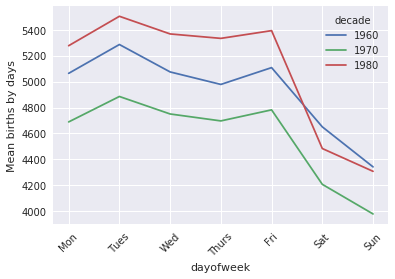

In [ ]:
fig = plt.figure(figsize = (12,6))
df.pivot_table("births",index='dayofweek',columns="decade", aggfunc="mean").plot()


days=["random",'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
ax.set_xticks(np.arange(len(days)))
plt.gca().set_xticklabels(days, rotation = 45)
plt.ylabel("Mean births by days")


f) Focusing on the month and day only, we now have a time series reflecting the aver-
age number of births by date of the year. Plot this time series and comment on any
interesting trends you observe?